<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Cancer issue <br>
    (EDA / ML / DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Cancer issue (EDA / ML / DL) (Classification)</div>**


## Goal
> ## EDA : Data Distribution, Column Analysis
> ## Modeling : Predicting Recurrence

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/cancer-issue/cancer issue.csv')
df.head()

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NaN,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          17686 non-null  int64  
 1   Age                17686 non-null  int64  
 2   Gender             17686 non-null  object 
 3   Race/Ethnicity     17686 non-null  object 
 4   BMI                17686 non-null  float64
 5   SmokingStatus      17686 non-null  object 
 6   FamilyHistory      17686 non-null  object 
 7   CancerType         17686 non-null  object 
 8   Stage              17686 non-null  object 
 9   TumorSize          17686 non-null  float64
 10  TreatmentType      17686 non-null  object 
 11  TreatmentResponse  17686 non-null  object 
 12  SurvivalMonths     17686 non-null  int64  
 13  Recurrence         17686 non-null  object 
 14  GeneticMarker      13360 non-null  object 
 15  HospitalRegion     17686 non-null  object 
dtypes: float64(2), int64(3

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,17686.0,8843.500000,5105.652766,1.0,4422.25,8843.5,13264.75,17686.0
Age,17686.0,53.758396,21.079473,18.0,35.00,54.0,72.00,90.0
BMI,17686.0,29.253805,6.203575,18.5,23.90,29.2,34.60,40.0
TumorSize,17686.0,5.499751,2.603107,1.0,3.30,5.5,7.70,10.0
SurvivalMonths,17686.0,60.387821,34.794859,1.0,30.00,60.0,91.00,120.0


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Gender,17686,2,Female,8930
Race/Ethnicity,17686,5,Asian,3599
SmokingStatus,17686,3,Former Smoker,5915
FamilyHistory,17686,2,Yes,8863
CancerType,17686,6,Skin,2980
Stage,17686,4,I,4471
TreatmentType,17686,4,Surgery,4493
TreatmentResponse,17686,3,Partial Remission,5951
Recurrence,17686,2,No,8870
GeneticMarker,13360,3,BRCA1,4478


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
df.drop('PatientID', axis=1, inplace=True)

print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                   0.000000
Gender                0.000000
Race/Ethnicity        0.000000
BMI                   0.000000
SmokingStatus         0.000000
FamilyHistory         0.000000
CancerType            0.000000
Stage                 0.000000
TumorSize             0.000000
TreatmentType         0.000000
TreatmentResponse     0.000000
SurvivalMonths        0.000000
Recurrence            0.000000
GeneticMarker        24.460025
HospitalRegion        0.000000
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
df['GeneticMarker'].unique()

array([nan, 'BRCA1', 'KRAS', 'EGFR'], dtype=object)

### In my opinion, the missing value means 'none'.

In [8]:
df['GeneticMarker'].fillna('nan', inplace=True)
df['GeneticMarker'].unique()

array(['nan', 'BRCA1', 'KRAS', 'EGFR'], dtype=object)

In [9]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

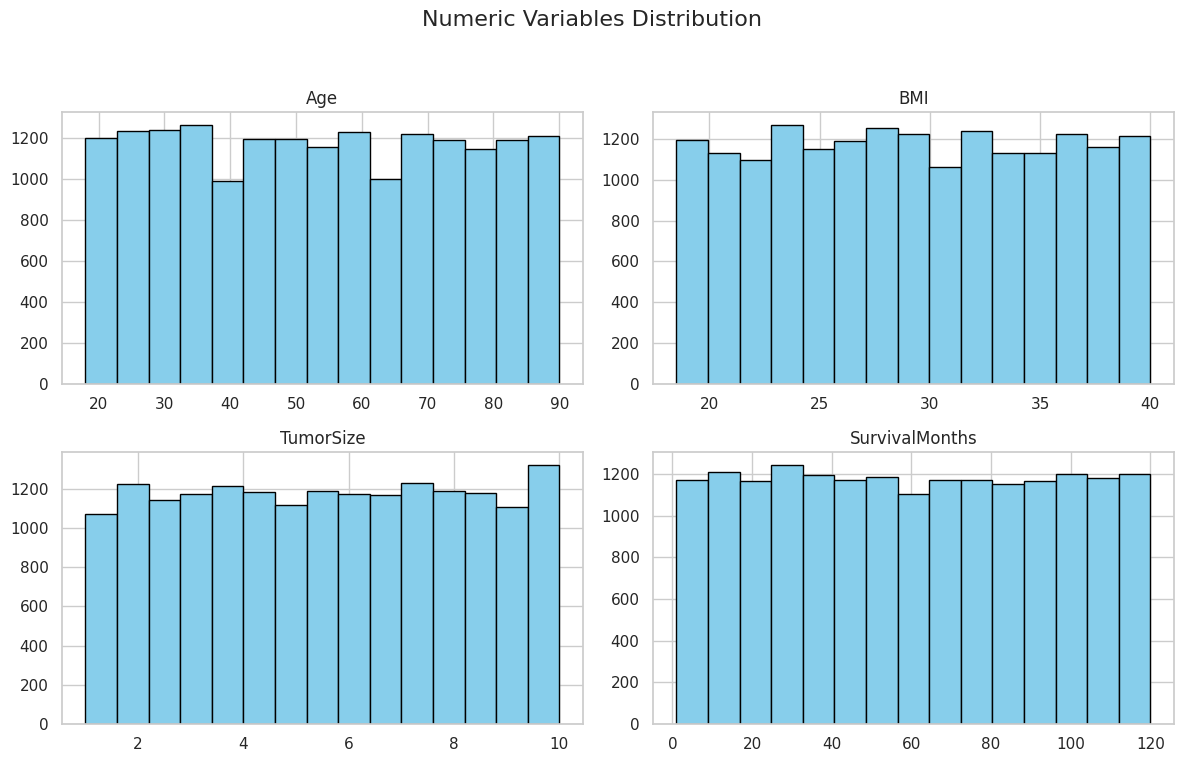

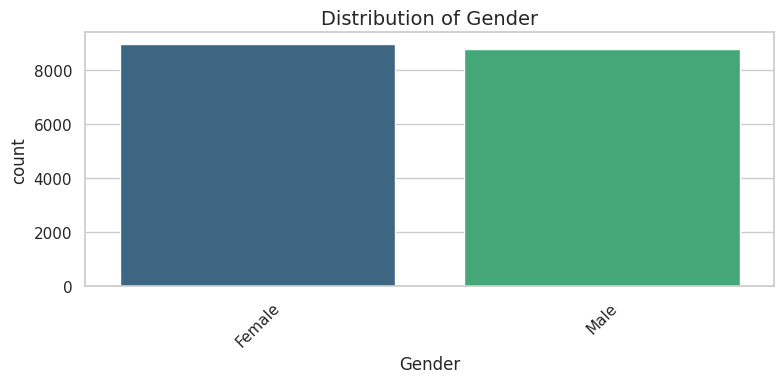

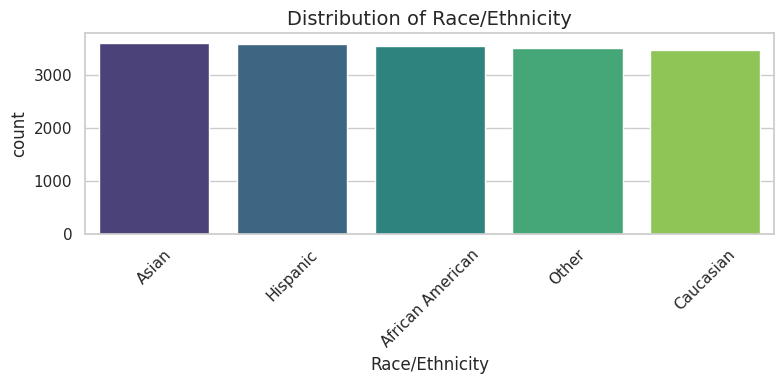

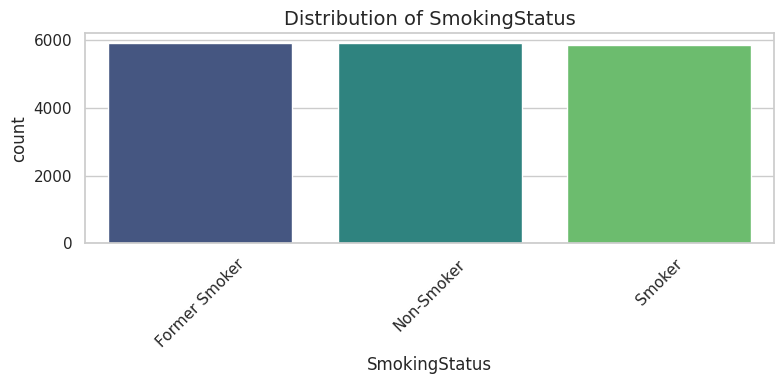

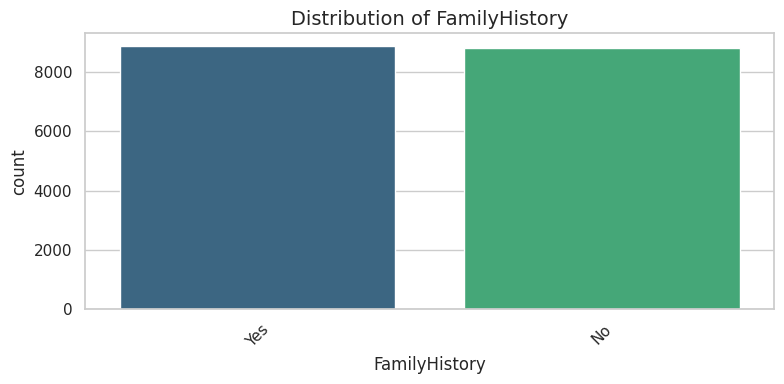

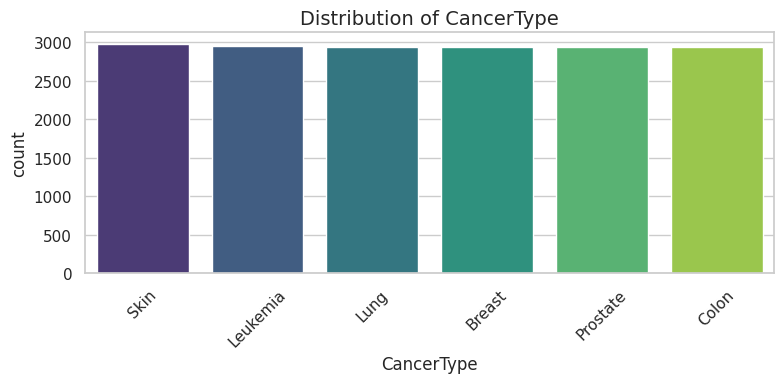

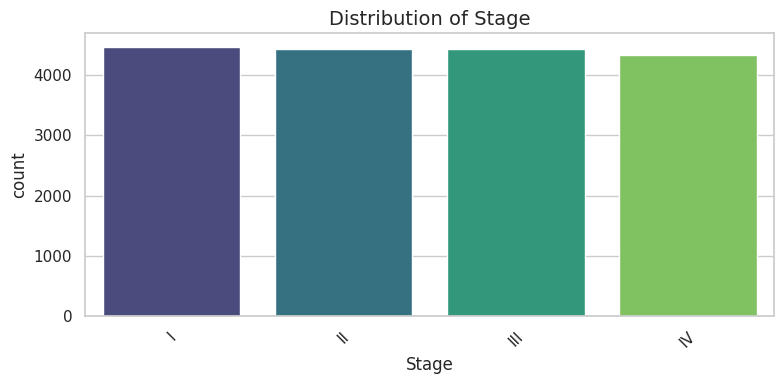

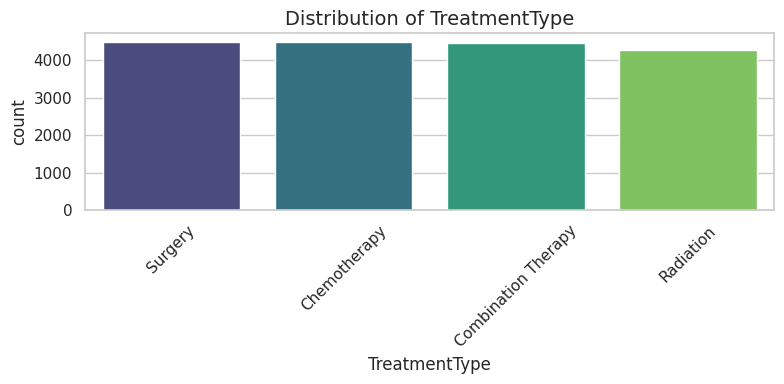

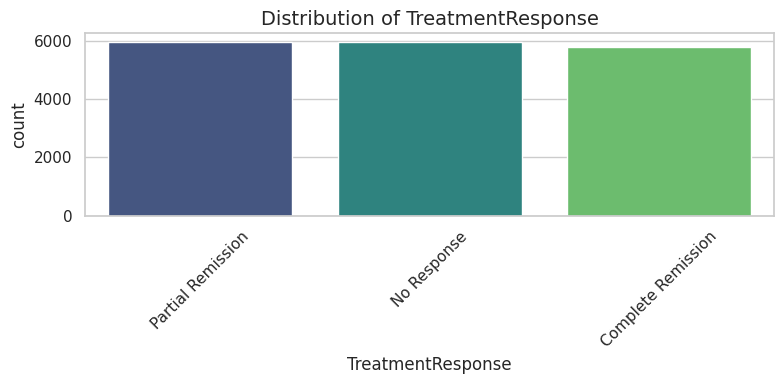

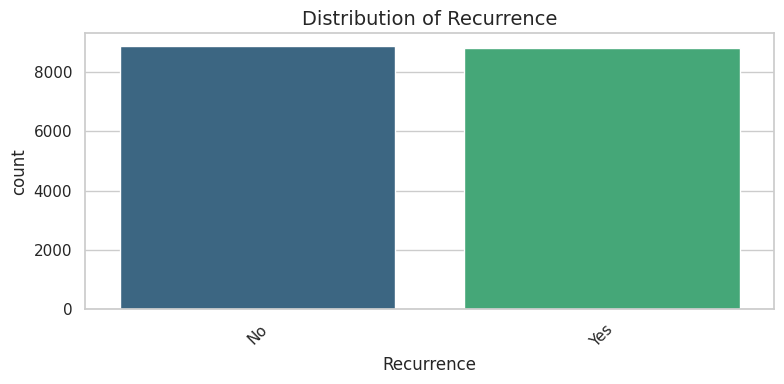

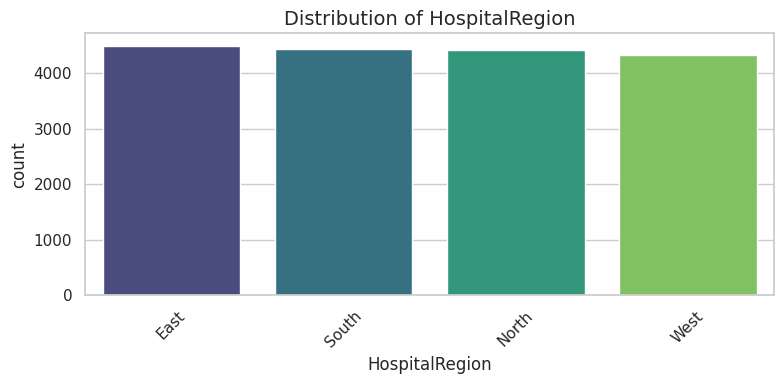

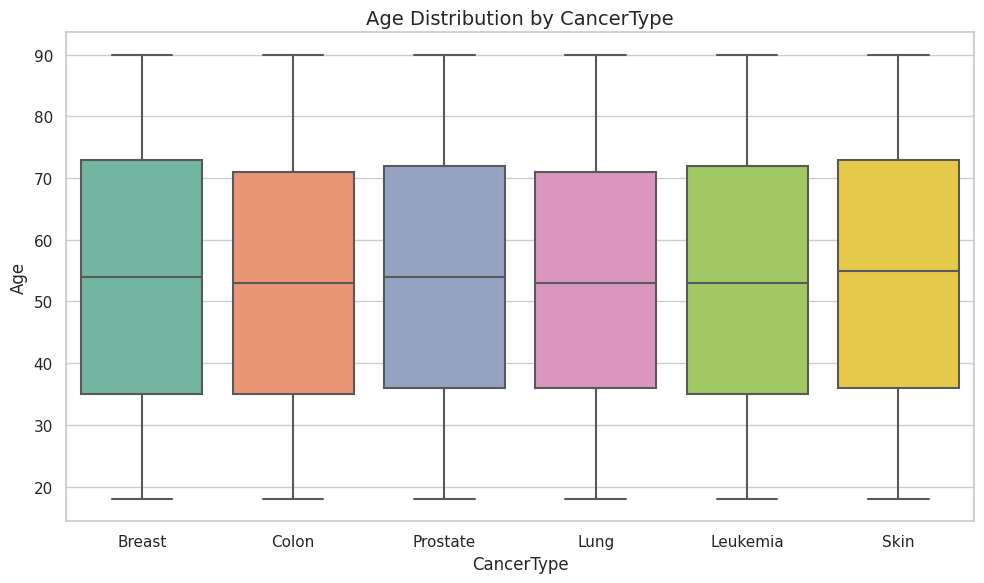

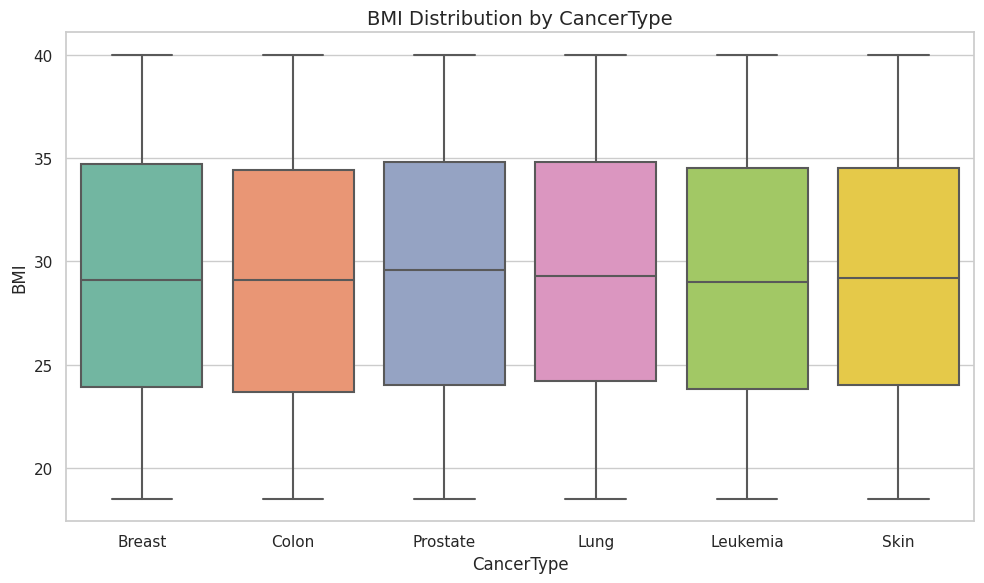

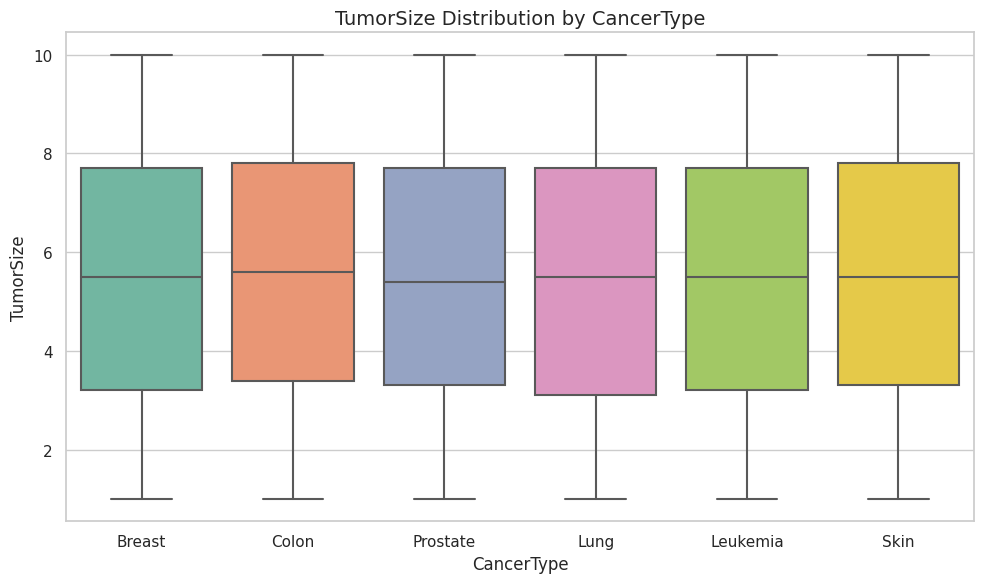

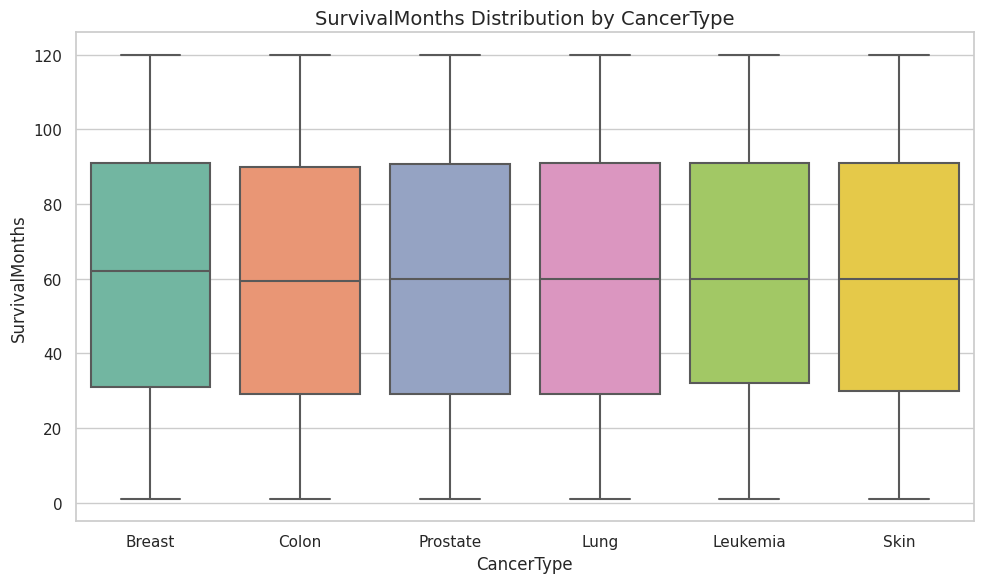

In [10]:
sns.set(style="whitegrid")

# Distribution of numeric variables
numeric_cols = ['Age', 'BMI', 'TumorSize', 'SurvivalMonths']
df[numeric_cols].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Variables Distribution", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Distribution of categorical variables
categorical_cols = ['Gender', 'Race/Ethnicity', 'SmokingStatus', 'FamilyHistory', 
                    'CancerType', 'Stage', 'TreatmentType', 'TreatmentResponse', 
                    'Recurrence', 'HospitalRegion']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Boxplot of numeric variables by CancerType
for num_col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='CancerType', y=num_col, palette='Set2', showfliers=False)
    plt.title(f"{num_col} Distribution by CancerType", fontsize=14)
    plt.tight_layout()
    plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

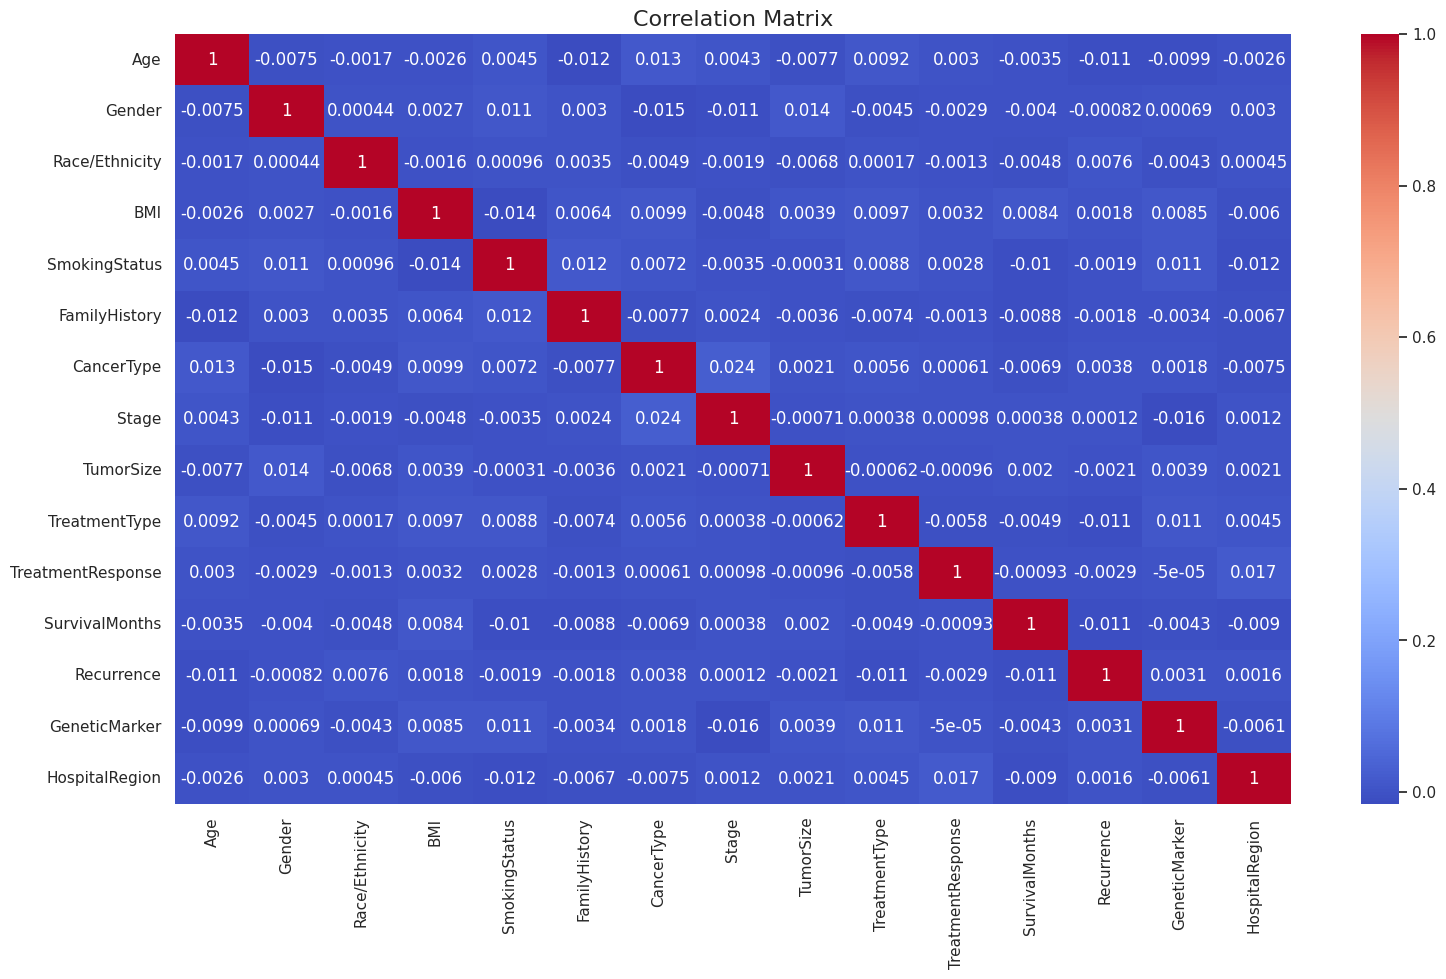

In [11]:
# Initialize label encoders and store them in a dictionary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Select numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply scaling to numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Compute the correlation matrix after scaling and encoding
correlation_matrix = df.corr(method='pearson')

# Visualize the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

### Assume that there is no multicollinearity problem 

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [12]:
X = df.drop('Recurrence', axis=1)
y = df['Recurrence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [13]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.492369,0.494236,0.492369,0.485271
1,KNN,0.497739,0.498206,0.497739,0.497613
2,Decision Tree,0.492934,0.493218,0.492934,0.492943
3,Random Forest,0.503109,0.504176,0.503109,0.501930
4,XGBoost,0.485585,0.485847,0.485585,0.485603


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [14]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4914 - loss: 0.6981 - val_accuracy: 0.4845 - val_loss: 0.6968
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5114 - loss: 0.6935 - val_accuracy: 0.4965 - val_loss: 0.6951
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5129 - loss: 0.6926 - val_accuracy: 0.5025 - val_loss: 0.6937
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5254 - loss: 0.6918 - val_accuracy: 0.4961 - val_loss: 0.6944
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5219 - loss: 0.6916 - val_accuracy: 0.5071 - val_loss: 0.6940
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5371 - loss: 0.6905 - val_accuracy: 0.5074 - val_loss: 0.6941
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5413 - loss: 0.6894 - val_accuracy: 0.4862 - val_loss: 0.6969
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5328 - loss: 0.6900 - val_accuracy: 0.

In [15]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5012 - loss: 0.6974 - val_accuracy: 0.5110 - val_loss: 0.6932
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4998 - loss: 0.6947 - val_accuracy: 0.5049 - val_loss: 0.6934
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5187 - loss: 0.6929 - val_accuracy: 0.4996 - val_loss: 0.6935
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5114 - loss: 0.6921 - val_accuracy: 0.5102 - val_loss: 0.6932
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - loss: 0.6927 - val_accuracy: 0.5021 - val_loss: 0.6942
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5155 - loss: 0.6924 - val_accuracy: 0.4883 - val_loss: 0.6952
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5208 - loss: 0.6918 - val_accuracy: 0.5071 - val_loss: 0.6938
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5194 - loss: 0.6915 - val_accuracy: 0.

In [16]:
# CNN Model

X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 12, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5096 - loss: 0.6945 - val_accuracy: 0.5141 - val_loss: 0.6931
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5109 - loss: 0.6928 - val_accuracy: 0.5191 - val_loss: 0.6928
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5148 - loss: 0.6922 - val_accuracy: 0.5138 - val_loss: 0.6936
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.4996 - val_loss: 0.6939
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5224 - loss: 0.6919 - val_accuracy: 0.5159 - val_loss: 0.6931
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5230 - loss: 0.6912 - val_accuracy: 0.4880 - val_loss: 0.6969
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5174 - loss: 0.6913 - val_accuracy: 0.4883 - val_loss: 0.6968
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5329 - loss: 0.6900 - val_accuracy: 0.

In [17]:
# Optimized Model 
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
optimized_model.summary()

history = optimized_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = optimized_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,057 (51.00 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5070 - loss: 0.7664 - val_accuracy: 0.4919 - val_loss: 0.7024
Epoch 2/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4904 - loss: 0.7167 - val_accuracy: 0.4890 - val_loss: 0.7031
Epoch 3/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5148 - loss: 0.7038 - val_accuracy: 0.5049 - val_loss: 0.6992
Epoch 4/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5167 - loss: 0.6992 - val_accuracy: 0.4926 - val_loss: 0.7005
Epoch 5/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5060 - loss: 0.6994 - val_accuracy: 0.4901 - val_loss: 0.7014
Epoch 6/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5073 - loss: 0.6975 - val_accuracy: 0.5120 - val_loss: 0.6976
Epoch 7/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5261 - loss: 0.6931 - val_accuracy: 0.4982 - val_loss: 0.6979
Epoch 8/10
354/354 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5144 - loss: 0.6940 - val_accuracy: 0.

In [18]:
def evaluate_model_on_test(model, X_test, y_test):
    y_pred_prob = model.predict(X_test, verbose=0)
    
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "MLP": mlp_model,
    "CNN": cnn_model,
    "Optimized NN": optimized_model
}

for model_name, model in models_dict.items():
    if model_name == "CNN":  
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test_reshaped, y_test)
    else:
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)

results_df2

,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.502261,0.494729,0.502261,0.446521
1,MLP,0.496326,0.496562,0.496326,0.496353
2,CNN,0.504805,0.502953,0.504805,0.497154
3,Optimized NN,0.502826,0.499631,0.502826,0.484765


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model        Random Forest
Accuracy          0.503109
Precision         0.504176
Recall            0.503109
F1-Score           0.50193
Name: 3, dtype: object


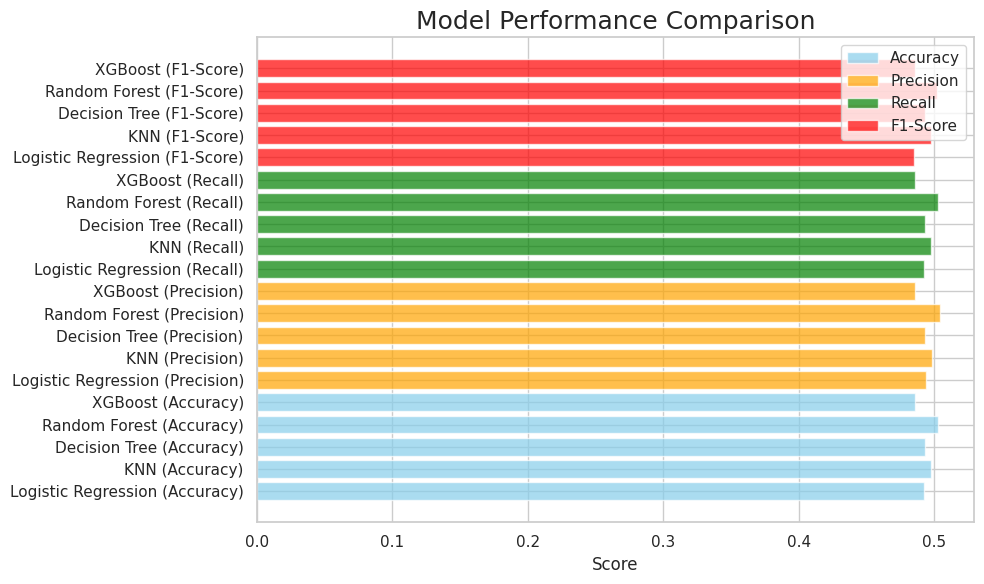


Optimal Model based on Accuracy: Random Forest with Accuracy = 0.5031


In [19]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model        Optimized NN
Accuracy         0.502826
Precision        0.499631
Recall           0.502826
F1-Score         0.484765
Name: 3, dtype: object


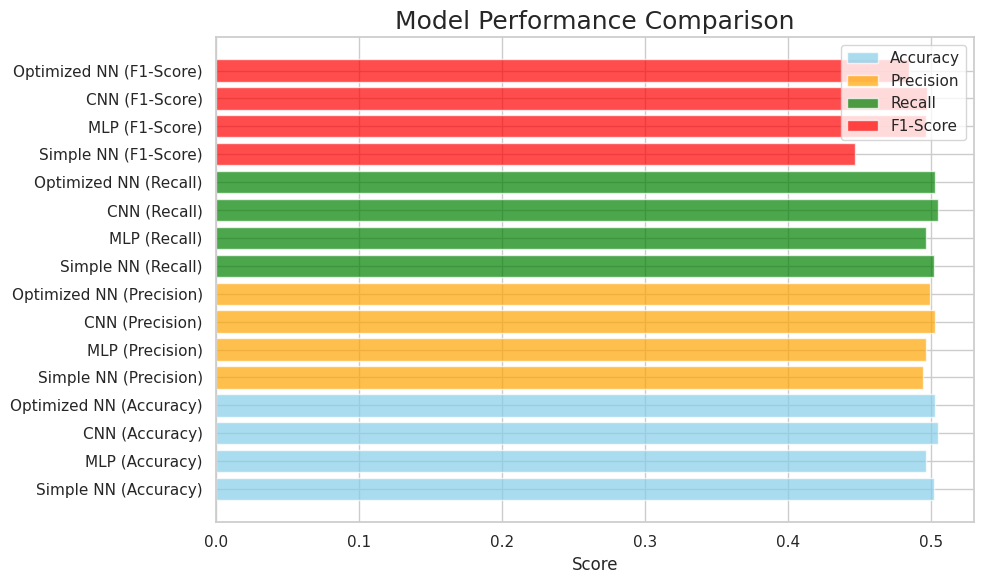


Optimal Model based on Accuracy: Optimized NN with Accuracy = 0.5028


In [20]:
best_model2 = results_df2.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

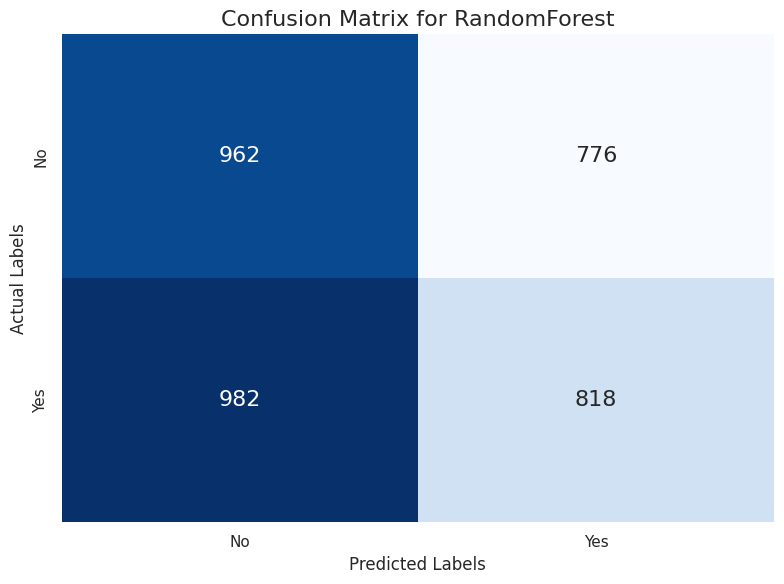

In [21]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], 
            yticklabels=["No", "Yes"], cbar=False, annot_kws={"size": 16})

plt.title("Confusion Matrix for RandomForest", fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.tight_layout()
plt.show()

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>